In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков


In [2]:
df = pd.read_csv('water.csv', encoding='utf-8')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


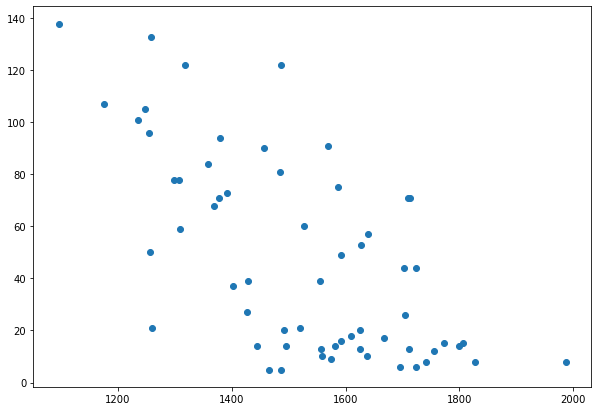

In [3]:
#Точечный график
plt.figure(figsize = (10,7))
plt.scatter(df['mortality'], df['hardness'])

In [4]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


<font size = 6> LinearRegression

In [7]:
x = df[['mortality']].values
y = df['hardness'].values

In [8]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Коэффициент детерминации
model.score(x,y)

0.4288267193124973

In [10]:
model.coef_

array([-0.13292453])

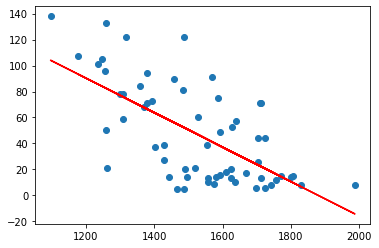

In [11]:
#модель линейной регрессии
plt.scatter(df['mortality'], df['hardness'])
plt.plot(df['mortality'],model.predict(df[['mortality']]),c = 'r')

In [35]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [36]:
x = sm.add_constant(x)

In [38]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           1.03e-08
Time:                        14:08:05   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

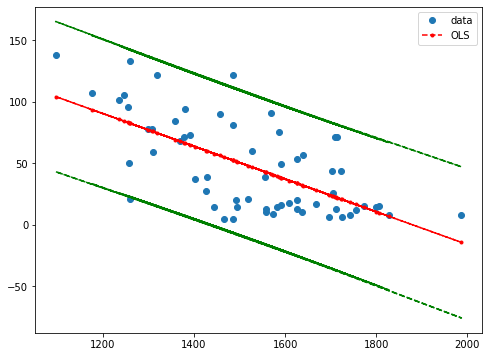

In [40]:
prstd,iv_l,iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x[:,1],y,'o', Label = 'data')
ax.plot(x[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x[:,1], iv_u, 'g--')
ax.plot(x[:,1], iv_l, 'g--')
ax.legend(loc='best')

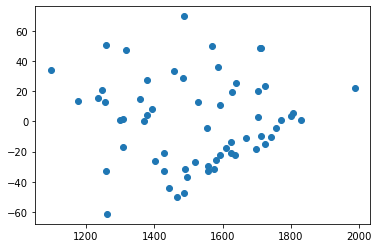

In [42]:
#график остатков
plt.scatter(x[:,1], results.resid)

# 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [43]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [47]:
df_south = df[df['location'] == 'South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [48]:
df_north = df[df['location'] == 'North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<font size =6 >South

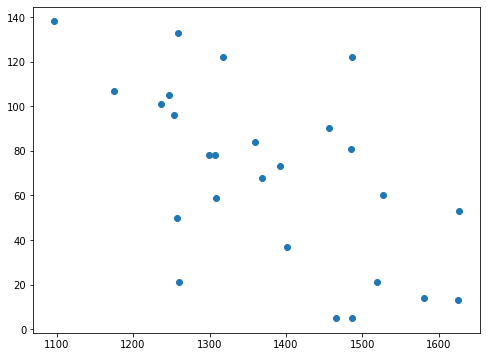

In [49]:
#Точечный график
plt.figure(figsize = (8,6))
plt.scatter(df_south['mortality'], df_south['hardness'])

In [51]:
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [53]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [54]:
x1 = df_south[['mortality']].values
y1 = df_south['hardness'].values
model = LinearRegression()
model.fit(x1,y1)
#Коэффициент детерминации
model.score(x1,y1)

0.3625885624364602

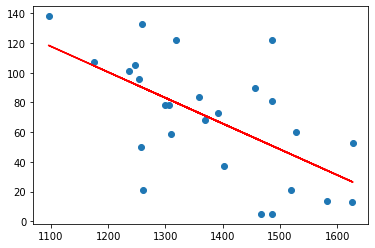

In [55]:
#модель линейной регрессии
plt.scatter(df_south['mortality'], df_south['hardness'])
plt.plot(df_south['mortality'],model.predict(df_south[['mortality']]),c = 'r')

In [57]:
x1 = sm.add_constant(x1)
model = sm.OLS(y1,x1)
results = model.fit()

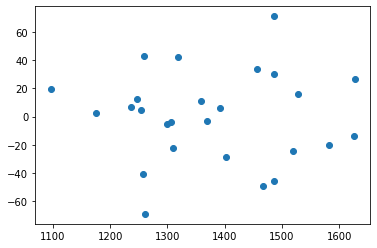

In [58]:
#график остатков
plt.scatter(x1[:,1], results.resid)

<font size=6>North

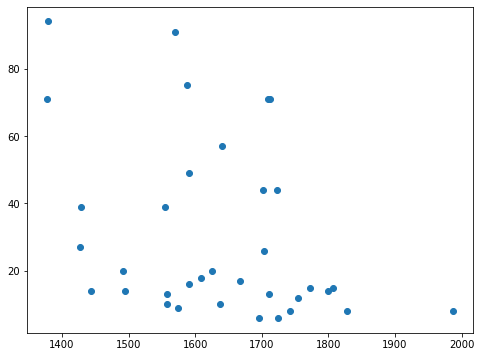

In [50]:
#Точечный график
plt.figure(figsize = (8,6))
plt.scatter(df_north['mortality'], df_north['hardness'])

In [59]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [60]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [61]:
x2 = df_north[['mortality']].values
y2 = df_north['hardness'].values
model = LinearRegression()
model.fit(x2,y2)
#Коэффициент детерминации
model.score(x2,y2)

0.13586436642071698

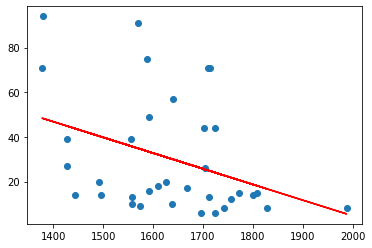

In [64]:
#модель линейной регрессии
plt.scatter(df_north['mortality'], df_north['hardness'])
plt.plot(df_north['mortality'],model.predict(df_north[['mortality']]),c = 'r')

In [65]:
x2 = sm.add_constant(x2)
model = sm.OLS(y2,x2)
results = model.fit()

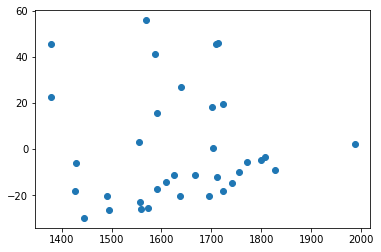

In [66]:
#график остатков
plt.scatter(x2[:,1], results.resid)

Глядя на графики разбитые по Северу и Югу, зависимость совсем теряется. Хотя линейная регрессия показывает что остается. 
